In [1]:
#All files:
# 1) "C:\Users\Bradley\Videos\New folder\AgBH_cali_5m_13.5kev_2_1961.7s_RH661.032_x0.300_th0.000_5.00s_458795_waxs.tiff"
# 2) "C:\Users\Bradley\Videos\New folder\AgBH_cali_5m_13.5kev_6_2795.4s_RH-28.010_x0.300_th0.000_5.00s_458825_saxs.tiff"
# 3) "C:\Users\Bradley\Videos\New folder\AgBH_cali_5m_13.5kev_WAXSx-193_y22_x0.300_th0.000_5.00s_1000930_waxs.tiff"
# 4) "C:\Users\Bradley\Videos\New folder\AgBH_cali_5m_13.5kev_x0.000_y0.000_10.00s_988715_saxs.tiff"
# 5) "C:\Users\Bradley\Videos\New folder\AgBH_cali_5m_13.5kev_x0.000_y0.000_10.00s_988715_waxs.tiff"

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

In [51]:
img = Image.open(r"C:\Users\Bradley\Videos\New folder\AgBH_cali_5m_13.5kev_WAXSx-193_y22_x0.300_th0.000_5.00s_1000930_waxs.tiff")
#for the image you just insert the file path. On Windows 10 this is found by left clicking once on an image and then going above it and finding where it says "copy path"
#take the path and insert it (with the quotations included) after r into the Image.open(r) function
#so like "Image.open(r"C:\filename")
img1 = img.convert('I') # 'I' : 32-bit integer pixels
img1.show()

In [52]:
img2 = np.asarray(Image.open("/Users/Bradley/Videos/New folder/AgBH_cali_5m_13.5kev_WAXSx-193_y22_x0.300_th0.000_5.00s_1000930_waxs.tiff"))
# for numpy version of file all backslashes turned in forward slashes. Also no "r" and C: as shown in cell 1.

In [53]:
print(img2) #Each inner list represents a row. All the elements in the same positions in each inner array form a column
#repr() just gives a printable version of the object (the img2 array in this case)
print()
print("Row amount: "+str(len(img2))+" Column amount: "+str(len(img2[0]))) #len(img2[0]) used since it is rectangular
#amount of arrays in the 2D array- which should tell us the row number. The column number is also given. Basically the dimensions of our image.
#negative value are the missing parts of the image which have no intensity value. Also the image being put on my computer can slightly corrupt it so it makes more gaps and thus more negative values.

[[ 2  5  6 ... 42 34 38]
 [ 4  2  3 ... 57 48 43]
 [ 7  7  4 ... 46 47 37]
 ...
 [-2 -2 -2 ...  8 10 14]
 [-2 -2 -2 ...  7 10  8]
 [-2 -2 -2 ...  8  6  8]]

Row amount: 1043 Column amount: 981


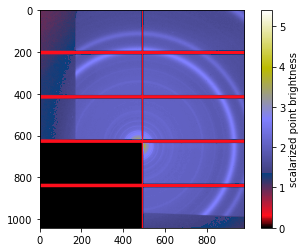

In [54]:
plt.imshow(np.log10(img2+3), cmap="gist_stern")
plt.colorbar(label="scalarized point brightness") #tells you the "strength" of the image at this point 

In [55]:
def cluster_avg(val_list):
    hold_avgs=np.array([])
    hold_indices=np.array([])
    lastindex=0
    for j in range((len(val_list)-1)):#we don't want to go out of bounds. so keep the j+1 from going too far.
        if(val_list[j+1]>(val_list[j]+10)): #The +10 is just a number I have to be the amount above to split. So if values differ by 10, the array splits between these indices.
            for k in range(lastindex, (j+1)): #go from previous cluster's last index to the next one that starts a new cluster.
                hold_indices=np.append(hold_indices, val_list[k]) #put the cluster's indices in an array
            hold_avgs=np.append(hold_avgs, np.nanmean(hold_indices)) #put the mean of the cluster's indices in an array
            hold_indices=np.array([]) #empty the array that holds the indices
            lastindex=j+1 # move the last index up so we will not look at the same cluster again in our for loop
    
        elif(val_list[j+1]==val_list[-1]):
            for k in range(lastindex, (j+1)): #go from previous cluster's last index to the next one that starts a new cluster. This doesn't include the final array element
                hold_indices=np.append(hold_indices, val_list[k]) #put the cluster's indices in an array
            hold_indices=np.append(hold_indices, val_list[-1]) #include the final element of save
            hold_avgs=np.append(hold_avgs, np.nanmean(hold_indices)) #put the mean of the cluster's indices in an array
            hold_indices=np.array([]) #empty the array that holds the indices
            lastindex=j+1 # move the last index up so we will not look at the same cluster again in our for loop
    avg_of_clusters=np.nanmean(hold_avgs)  
    
    return(avg_of_clusters)





def mode_finder(list_input):
    vals,counts = np.unique(list_input, return_counts=True)
    mode = np.argmax(counts)
    true_mode=vals[mode]
    
    return(true_mode)




def one_dim_search_rows(array_input,threshold_value):
    hold_avg=np.array([])
    holding_array=np.array([])
    for a in range(len(array_input)):
        valmax=np.amax(array_input[a]) #get the actual max value in the array
        lowerbound=threshold_value*valmax #we want to see where values above this are. The high intensity values. I chose a 15% threshold.
        for i in range(len(array_input[a])): #go through one row at a time
            if img2[a][i]>lowerbound:
                holding_array=np.append(holding_array,i) #get indices of higher values in an array
        
        hold_avg=np.append(hold_avg,cluster_avg(holding_array))
        holding_array=np.array([])
        
    return(hold_avg)



    
def one_dim_search_cols(array_input,threshold_value):
    hold_avg=np.array([])
    holding_array=np.array([])
    for b in range(len(array_input[0])): #go through every column and note that img2[0] is the size of the number of columns.
        valmax=np.amax(array_input[:,b]) #get the actual max value in that column. 
        lowerbound=threshold_value*valmax #we want to see where values above this are. The high intensity values. I chose a 15% threshold.
        for j in range(len(img2[:,b])): #go through each index of the column
            if img2[:,b][j]>lowerbound: #if the element is larger than our bound
                holding_array=np.append(holding_array,j) #get the indicies of the larger elements and add them all to a list
                
        hold_avg=np.append(hold_avg,cluster_avg(holding_array))
        holding_array=np.array([])
                
    return(hold_avg)

C:\Users\Bradley\AppData\Local\Temp/ipykernel_13664/1298065472.py:20: RuntimeWarning: Mean of empty slice
  avg_of_clusters=np.nanmean(hold_avgs)


threshold=1	[nan,nan]
threshold=0.95	[470.0,212.5]
threshold=0.8999999999999999	[470.0,193.5]
threshold=0.8499999999999999	[494.5,193.0]
threshold=0.7999999999999998	[494.5,193.0]
threshold=0.7499999999999998	[494.5,192.5]
threshold=0.6999999999999997	[494.5,192.0]
threshold=0.6499999999999997	[494.5,191.5]
threshold=0.5999999999999996	[494.5,216.0]
threshold=0.5499999999999996	[494.5,190.5]
threshold=0.4999999999999996	[495.0,217.0]
threshold=0.4499999999999996	[495.0,614.5]
threshold=0.39999999999999963	[495.5,614.0]
threshold=0.34999999999999964	[496.0,610.5]
threshold=0.29999999999999966	[496.0,610.0]
threshold=0.24999999999999967	[497.0,609.5]
threshold=0.19999999999999968	[497.5,609.0]
threshold=0.1499999999999997	[498.5,592.75]
threshold=0.09999999999999969	[737.0,309.0]
threshold=0.049999999999999684	[737.0,309.0]


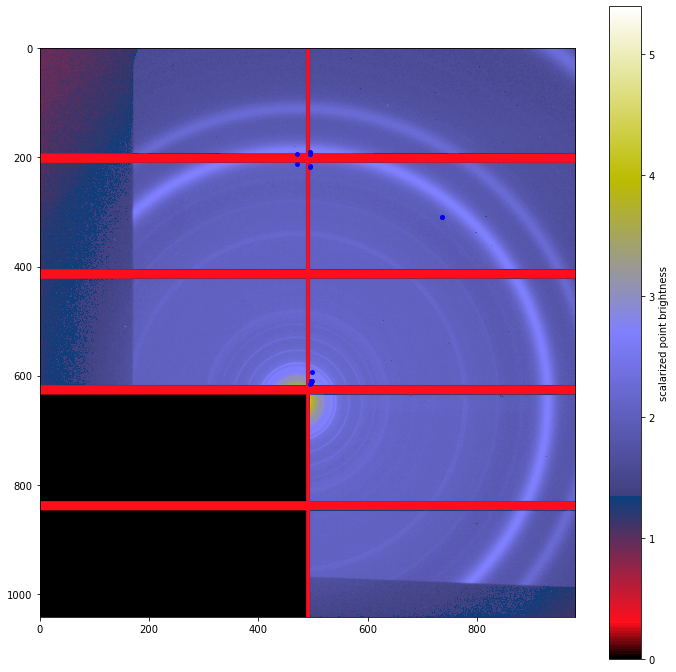

In [57]:
#vary the threshold by 0.05 and plot the centers
plt.figure(100, figsize=(12, 12))
plt.imshow(np.log10(img2+3), cmap="gist_stern")
cbar=plt.colorbar(label="scalarized point brightness")

threshold=1


while(threshold>0):
    keep_mode=np.array([])

#use the averaging method defined above and then get mode
                
#for rows

    keep_mode=np.append(keep_mode, mode_finder(one_dim_search_rows(img2,threshold)))



#for columns
    
    keep_mode=np.append(keep_mode, mode_finder(one_dim_search_cols(img2,threshold)))


    
    print("threshold="+str(threshold)+"\t["+str(keep_mode[0])+","+str(keep_mode[1])+"]")
    plt.scatter(keep_mode[0], keep_mode[1], s=15, c="blue")
    threshold-=0.05